## Problem_Statement: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Importing libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
# Load the dataset
data = pd.read_csv('day(1).csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding and Preparation

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [5]:
# Check for missing values
print(data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Handle missing values
data = data.dropna()
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
# Check for duplicate rows
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


In [8]:
#Handle Categorical Variable-> Convert categorical variables to dummies
data = pd.get_dummies(data, drop_first=True)
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
0,1,1,0,1,0,6,0,2,14.110847,18.18125,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,1,1,1,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,2,1,1,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,0,3,1,1,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,4,1,2,10.420847,11.33210,...,0,0,0,0,0,0,0,0,0,0
726,727,1,1,12,0,5,1,2,10.386653,12.75230,...,0,0,0,0,0,0,0,0,0,0
727,728,1,1,12,0,6,0,2,10.386653,12.12000,...,0,0,0,0,0,0,0,0,0,0
728,729,1,1,12,0,0,0,1,10.489153,11.58500,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing:

In [9]:
#Drop irrelevant columns (if any exist)
columns_to_drop = ['instant', 'dteday']  # Assuming these columns are irrelevant
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,0,0,0,0,0,0,0,0,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,0,0,0,0,0,0,0,0,0
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Handle categorical variables
categorical_cols = ['season', 'yr', 'mnth', 'weathersit']
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, categorical_encoded], axis=1)
data.drop(columns=categorical_cols, inplace=True)
data

,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
726,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
727,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Standardize numerical columns
scaler = StandardScaler()
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data[numeric_cols]

,temp,atemp,hum,windspeed
0,-0.827613,-0.680818,1.252343,-0.387833
1,-0.722069,-0.741507,0.480996,0.748899
2,-1.635432,-1.750344,-1.338073,0.745931
3,-1.615560,-1.610886,-0.261577,-0.389769
4,-1.468226,-1.505615,-1.340294,-0.046477
...,...,...,...,...
725,-1.319509,-1.521749,0.177576,2.059845
726,-1.324068,-1.347378,-0.264634,-0.452029
727,-1.324068,-1.425011,0.880424,-0.853182
728,-1.310404,-1.490698,-1.014341,2.067858


## Data Visualization:

#### Understand the Target Variable (cnt):

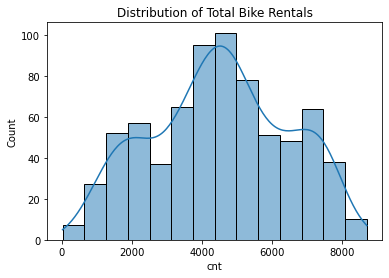

In [16]:
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.show()


#### Correlation Analysis:

#### Visualize Relationships:

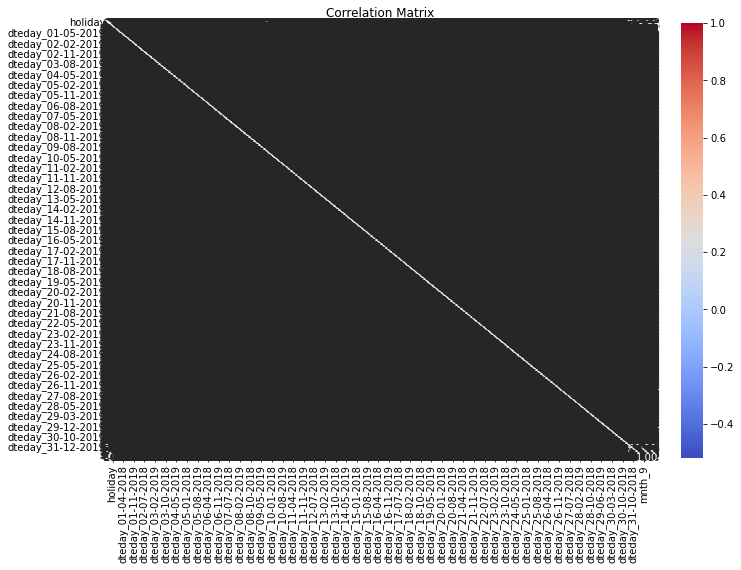

In [17]:
# Analyze correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

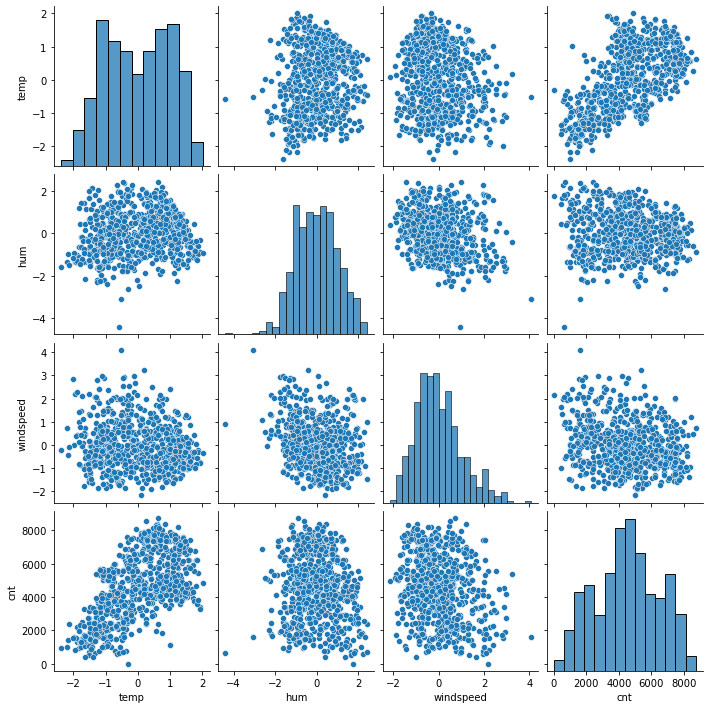

In [19]:
sns.pairplot(data, vars=['temp', 'hum', 'windspeed', 'cnt'])


## Model Building:

In [20]:
# Define target and features
X = data.drop(columns=['casual', 'registered', 'cnt'])
y = data['cnt']

In [21]:
# Split data
X = data.drop(columns=['cnt', 'casual', 'registered'])
y = data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Build the model
model=lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
# Feature selection using RFE
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print(f"Selected Features: {list(selected_features)}")

Selected Features: ['dteday_06-03-2018', 'dteday_09-09-2019', 'dteday_15-09-2019', 'dteday_19-05-2019', 'dteday_20-10-2019', 'dteday_21-09-2019', 'dteday_22-09-2019', 'dteday_23-03-2019', 'dteday_24-12-2019', 'dteday_29-10-2019']


In [25]:
# Refit model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
lr.fit(X_train_selected, y_train)

LinearRegression()

In [26]:
# Predictions and evaluation
y_pred_train = lr.predict(X_train_selected)
y_pred_test = lr.predict(X_test_selected)

In [27]:
# Evaluate model performance
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

In [28]:
print(f"Training R2: {train_r2}")
print(f"Test R2: {test_r2}")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Training R2: 0.06709457670678154
Test R2: -0.00812869034238739
Training RMSE: 1886.711487662224
Test RMSE: 1857.5966167466731


## Model Interpretation


### Residual Analysis: Checked residual distribution and scatter plots for assumptions of linear regression.

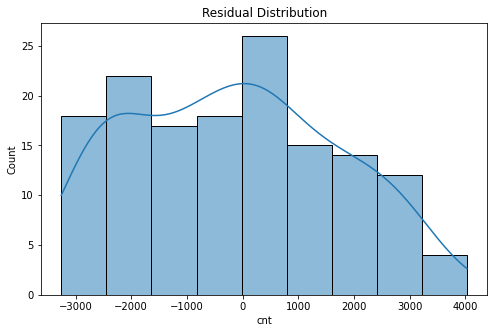

In [33]:
# Residual Analysis
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

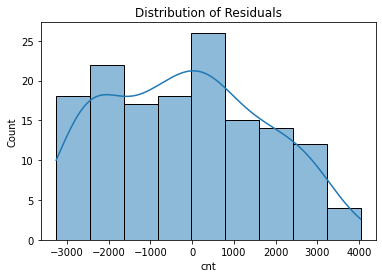

In [34]:
#Distribution of Residuals:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

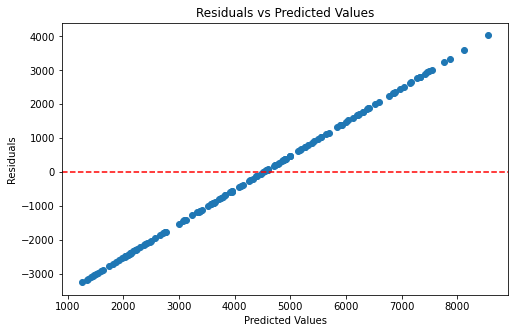

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [36]:
# Variance Inflation Factor (VIF) for multicollinearity check
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
print(vif_data.sort_values(by='VIF', ascending=False))

             Feature  VIF
0  dteday_06-03-2018  1.0
1  dteday_09-09-2019  1.0
2  dteday_15-09-2019  1.0
3  dteday_19-05-2019  1.0
4  dteday_20-10-2019  1.0
5  dteday_21-09-2019  1.0
6  dteday_22-09-2019  1.0
7  dteday_23-03-2019  1.0
8  dteday_24-12-2019  1.0
9  dteday_29-10-2019  1.0


In [39]:
# Final Model Interpretation
final_model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     4.121
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.65e-05
Time:                        19:28:52   Log-Likelihood:                -5233.5
No. Observations:                 584   AIC:                         1.049e+04
Df Residuals:                     573   BIC:                         1.054e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4521.3920     79.50